In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import random
from sklearn.calibration import calibration_curve

random.seed(100)

In [54]:
wine= pd.read_csv("C:\\Users\\Clide Dcosta\\Desktop\\data science and decision making\\winequality-red.csv")

In [55]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


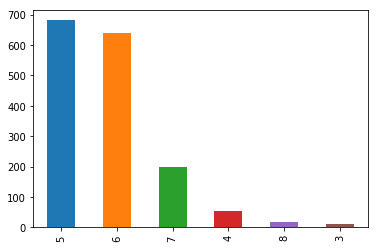

In [56]:
wine['quality'].value_counts().plot.bar()

In [57]:
# #Making binary classificaion for the response variable.
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [58]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [59]:
X = wine.drop('quality',axis=1)
y=wine['quality']

In [60]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [61]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [62]:
y=wine.quality.values   # values => np array
x_data=wine.drop(["quality"],axis=1)

In [63]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [65]:
scores_accuracy=[]
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

rf_score = rf.score(x_test,y_test)
scores_accuracy.append(["RF",rf_score])
prediction_of_probability = rf.predict_proba(x)
rf_score = rf.score(x_test,y_test)
scores_accuracy.append(["RF",rf_score])
print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.8916666666666667


In [146]:
rf_y, rf_x = calibration_curve(y_test, prediction_of_probability[:,1], n_bins=10)

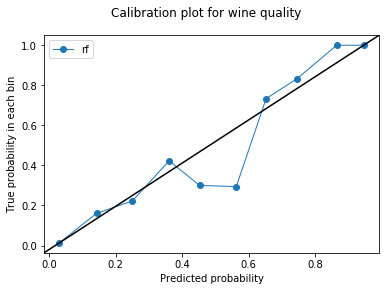

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for wine quality')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [66]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [67]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [68]:
x['bad quality'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [69]:
x['good quality'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [70]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bad quality,good quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0,0.1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,1.0,0.1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,1.0,0.1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.0,0.1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0,0.1


In [71]:
x.drop(columns="bad quality",axis=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.1


In [99]:
#df_test = pd.DataFrame(x_test)
#df_test['quality'] = y_test
#df_test['bad quality'] = prediction_of_probability[:,0]
#df_test['good quality'] = prediction_of_probability[:,1]
#df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bad quality,good quality
803,0.274336,0.301370,0.08,0.109589,0.170284,0.183099,0.141343,0.516153,0.393701,0.197605,0.184615,0,0.98,0.02
124,0.283186,0.260274,0.17,0.047945,0.116861,0.281690,0.339223,0.435389,0.511811,0.089820,0.169231,0,1.00,0.00
350,0.539823,0.376712,0.22,0.123288,0.158598,0.225352,0.098940,0.758443,0.425197,0.389222,0.230769,0,0.93,0.07
682,0.345133,0.232877,0.31,0.092466,0.110184,0.436620,0.183746,0.582232,0.464567,0.125749,0.215385,0,0.99,0.01
1326,0.185841,0.232877,0.24,0.054795,0.108514,0.239437,0.098940,0.347283,0.511811,0.161677,0.338462,0,1.00,0.00


In [100]:
#prediction = rf.predict_proba(x_train)
#df_1 = pd.DataFrame(x_train)
#df_1['quality'] = y_train
#df_1['bad quality'] = prediction[:,0]
#df_1['good quality'] = prediction[:,1]
#df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bad quality,good quality
925,0.353982,0.068493,0.36,0.068493,0.086811,0.732394,0.250883,0.438326,0.574803,0.323353,0.400000,1,0.23,0.77
363,0.699115,0.232877,0.63,0.075342,0.098497,0.070423,0.031802,0.640969,0.196850,0.323353,0.276923,0,0.87,0.13
906,0.230088,0.287671,0.27,0.116438,0.120200,0.154930,0.254417,0.464758,0.511811,0.227545,0.400000,0,0.97,0.03
426,0.159292,0.376712,0.08,0.082192,0.055092,0.253521,0.148410,0.354626,0.590551,0.095808,0.461538,0,0.99,0.01
1251,0.256637,0.315068,0.14,0.089041,0.108514,0.366197,0.190813,0.457416,0.425197,0.155689,0.215385,0,1.00,0.00


In [101]:
#df2 = df_test.append(df_1).sort_index()
#df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bad quality,good quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,1.00,0.00
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0,0.99,0.01
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0,1.00,0.00
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0,0.98,0.02
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,1.00,0.00


In [102]:
#X1= df2.drop('quality',axis=1)
#y1 = df2['quality'].values

In [72]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics
# classification rate
T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred5)
model_results1 = pd.DataFrame([['Decision tree on RF model', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results1



Accuracy: 0.95625


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree on RF model,0.95625,0.710526,0.9,0.794118


In [74]:
#Evaluating the model after transferring the knowledge
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))) 

Mean Absolute Error: 0.04375
Mean Squared Error: 0.04375
Root Mean Squared Error: 0.2091650066335189


In [75]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1, y_pred1))  
print(classification_report(y_test1, y_pred1))  

[[279  11]
 [  3  27]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       290
           1       0.71      0.90      0.79        30

   micro avg       0.96      0.96      0.96       320
   macro avg       0.85      0.93      0.88       320
weighted avg       0.96      0.96      0.96       320



In [76]:
#comparing the random forest model against the model created against training a decision tree classifier against the 
#probabilities generated by the RF model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.891667,0.647059,0.492537,0.559322


In [139]:
results1.drop([2,3,4],axis=0)


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree on orginal dataset,0.866667,0.517647,0.656716,0.578947
1,Random forest,0.891667,0.647059,0.492537,0.559322


In [141]:
 modelresults6=results1.append(model_results1,ignore_index=True)
modelresults6

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree on orginal dataset,0.866667,0.517647,0.656716,0.578947
1,Random forest,0.891667,0.647059,0.492537,0.559322
2,Random forest,0.891667,0.647059,0.492537,0.559322
3,Random forest,0.891667,0.647059,0.492537,0.559322
4,Random forest,0.891667,0.647059,0.492537,0.559322
5,Decision tree on RF model,0.956250,0.710526,0.900000,0.794118


In [144]:
modelresults6.drop([2,3,4],axis=0)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree on orginal dataset,0.866667,0.517647,0.656716,0.578947
1,Random forest,0.891667,0.647059,0.492537,0.559322
5,Decision tree on RF model,0.956250,0.710526,0.900000,0.794118


In [77]:
#performing logistic regresiion on the model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.8645833333333334


D:\narcos\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
#K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.86875 


In [79]:
# SVM Classification
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.8604166666666667


D:\narcos\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
# Decision Tree Classification
# Decision Tree With Sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.8625


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
results2 = pd.DataFrame([['Decision tree on orginal dataset', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results2

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree on orginal dataset,0.8625,0.505882,0.641791,0.565789


In [83]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8354166666666667


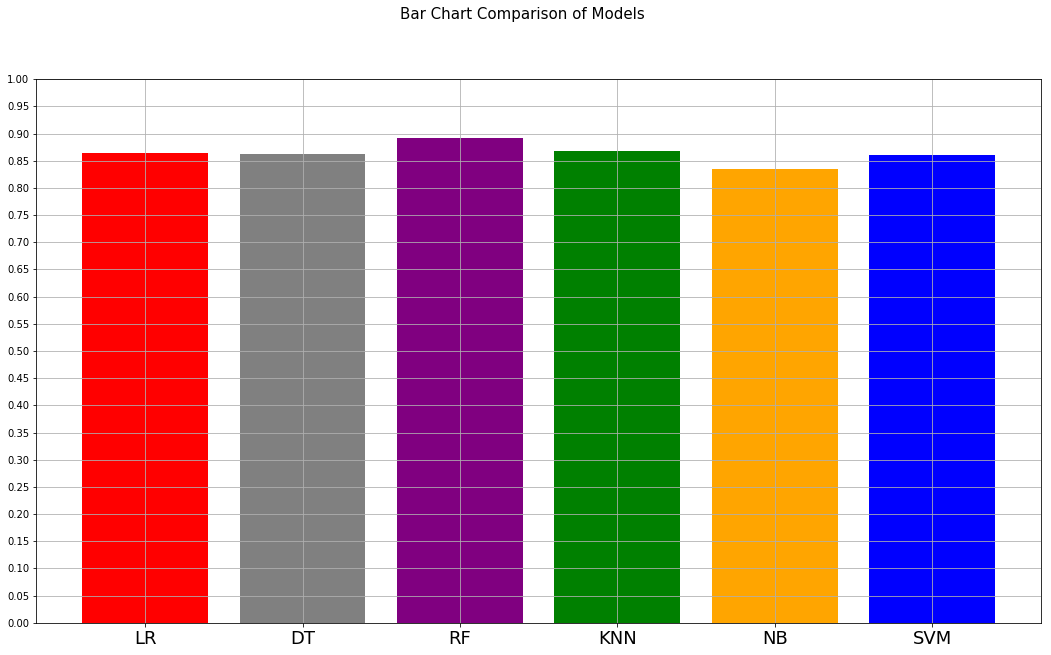

In [84]:
algorithms=("LR","DT","RF","KNN","NB","SVM")
scores = (lr_score,dt_score,rf_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

In [85]:
#Applying the ml algorithms on the dataset after transfrring the knowledge
# Logistic regression classication
# LR with sklearn
scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))

test accuracy 0.978125


D:\narcos\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.965625 


In [87]:
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.975


D:\narcos\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.946875
